# Lab 1 Four Peak NonLinearity Analysis

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import gridspec
from scipy.optimize import curve_fit

%matplotlib inline


In [3]:
class initialCleanUp:
    """ Cleaning up of the raw oscilliscope data. """
    def __init__(self, dataset):
        self.dataset = dataset
    
    def removeColsAndRows(self, dataStartRow):

        """
        Remove columns and rows that aren't useful for
        plotting.
        DataStartRow is the row where the data starts in the file.
        """

        self.dataset.drop(self.dataset.columns[[2]], axis=1, inplace=True)


        self.dataset = self.dataset.drop(labels=range(0, dataStartRow), axis=0)

        return self.dataset
    
class findPeaks:
    """ Finding the peaks of a panda dataset. """
    def __init__(self, data):
        self.data = data
    
    def max(self):
        """ 
        Find the maximum values and all of its corresponding row values.
        The twenty is so the values are off the exact peak by a little,
        it was suggested this would be a good step.
        """
        max_index = self.data.y.argmax()
        y_position_max = self.data.iloc[max_index+40, 0:2]
        return y_position_max
    
    def min(self):
        """ 
        Find the minimum values and all of its corresponding row values.
        The twenty is so the values are off the exact peak by a little,
        it was suggested this would be a good step.
        """
        min_index = self.data.y.argmin()
        y_position_min = self.data.iloc[min_index-40, 0:2]
        return y_position_min
        
        

Text(0.5, 1.0, 'This is a plot of the raw data from the oscilliscope. ')

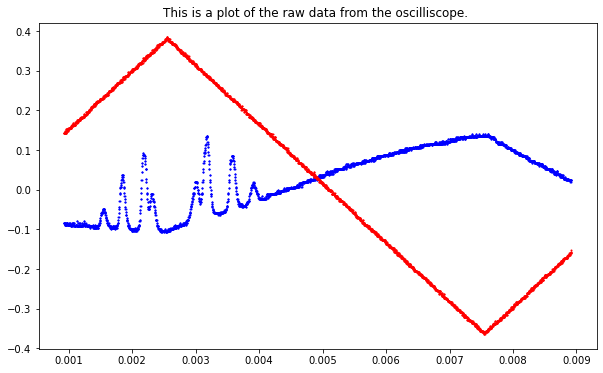

In [4]:
# Get the raw data from the oscilloscopes output
raw4peakData = pd.read_csv('/Users/starman/Desktop/PycharmProjects-fall-2021/'
                      'phy445-Lab1-FINAL/Data/nonlinearDoppler-part1/'
                      'A0005CH1.CSV')

rawTriangleWaveData = pd.read_csv('/Users/starman/Desktop/PycharmProjects-fall-2021/'
                      'phy445-Lab1-FINAL/Data/nonlinearDoppler-part1/'
                      'A0005CH2.CSV')

rawCopied4PeakData = raw4peakData.copy()
rawCopiedTriangleWaveData = rawTriangleWaveData.copy()


dataStart = 17

# Clear the unnessecary rows and columns from the raw data
cleanedUp4PeakData = initialCleanUp(rawCopied4PeakData).removeColsAndRows(dataStart)
cleanedUp4PeakData.columns = ['x', 'y']
cleanedUp4PeakData = cleanedUp4PeakData.astype(float)


cleanedUpTriangleWaveData = initialCleanUp(rawCopiedTriangleWaveData).removeColsAndRows(dataStart)
cleanedUpTriangleWaveData.columns = ['x', 'y']
cleanedUpTriangleWaveData = cleanedUpTriangleWaveData.astype(float)

# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])


ax1.scatter(cleanedUp4PeakData['x'], cleanedUp4PeakData['y'], c='blue', s=1)
ax1.scatter(cleanedUpTriangleWaveData['x'], cleanedUpTriangleWaveData['y'], c='red', s=1)


plt.title("This is a plot of the raw data from the oscilliscope. ")



Text(0.5, 1.0, 'The purple dots are the peaks, slightly off intentionally.')

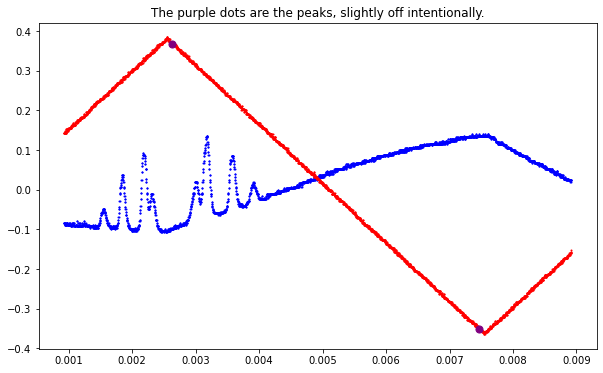

In [5]:
# Finding the min and max values of the triangle wave
y_min_position = findPeaks(cleanedUpTriangleWaveData).min()
y_max_position = findPeaks(cleanedUpTriangleWaveData).max()

# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.scatter(cleanedUp4PeakData['x'], cleanedUp4PeakData['y'], c='blue', s=1)
ax1.scatter(cleanedUpTriangleWaveData['x'], cleanedUpTriangleWaveData['y'], c='red', s=1)
ax1.scatter(y_min_position[0], y_min_position[1], s=50, c='purple')
ax1.scatter(y_max_position[0], y_max_position[1], s=50, c='purple')

plt.title('The purple dots are the peaks, slightly off intentionally.' )


# Chopping off the ends of the data

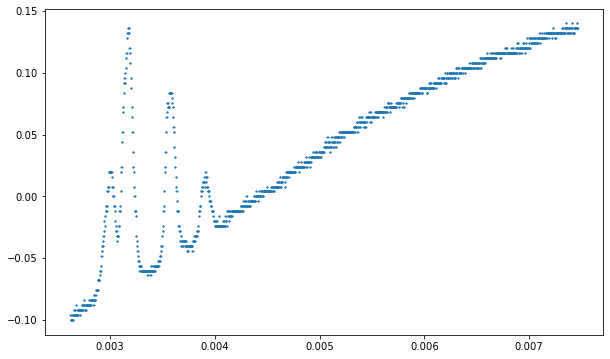

In [6]:
# Chopping off the ends of the data that are outside the above purple points.

chopped4PeakData = cleanedUp4PeakData.loc[(cleanedUp4PeakData.x >= y_max_position[0]) &
                                          (cleanedUp4PeakData.x <= y_min_position[0])]


# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.scatter(chopped4PeakData['x'], chopped4PeakData['y'], s=1)



# Fitting the curve

Text(0.5, 1.0, 'Fitting the choppedd data with an exponential and a 4 gaussian function together.')

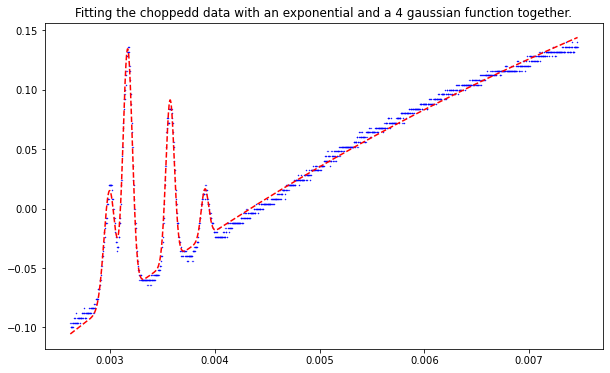

In [7]:
#Fitting the curve.

def exponentialAndGaussian(x, a,k,b, amp1,cen1,sigma1, amp2,cen2,sigma2, amp3,cen3,sigma3, amp4,cen4,sigma4):
    return ((a*np.exp(k*x) + b) +
            (amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2.0))) +
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen2)/sigma2)**2.0))) +
            amp3*(1/(sigma3*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen3)/sigma3)**2.0))) +
            amp4*(1/(sigma4*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen4)/sigma4)**2.0)))))

# Initial guess of the parameters of the fit
guess = [-1,3,-0.1, 0.01,0.0030,1e-5, 0.01,0.0032,1e-5, 0.01,0.0035,1e-5, 0.01,0.00390,1e-5]
parameters_exponential, pcov_exponential = curve_fit(f = exponentialAndGaussian, 
                                                     xdata = chopped4PeakData['x'], 
                                                     ydata = chopped4PeakData['y'], 
                                                     p0=guess)


a, k, b = parameters_exponential[0], parameters_exponential[1], parameters_exponential[2]

ampl1, cent1, sigm1 = parameters_exponential[3], parameters_exponential[4], parameters_exponential[5]
ampl2, cent2, sigm2 = parameters_exponential[6], parameters_exponential[7], parameters_exponential[8]
ampl3, cent3, sigm3 = parameters_exponential[9], parameters_exponential[10], parameters_exponential[11]
ampl4, cent4, sigm4 = parameters_exponential[12], parameters_exponential[13], parameters_exponential[14]


curveFitValues = [exponentialAndGaussian(i,a,k,b, ampl1,cent1,sigm1, ampl2,cent2,sigm2, ampl3,cent3,sigm3,
                              ampl4,cent4,sigm4) for i in chopped4PeakData['x']]

# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.scatter(chopped4PeakData['x'], chopped4PeakData['y'], s=0.1, c='blue')
ax1.plot(chopped4PeakData['x'], curveFitValues, '--', c='red')


plt.title("Fitting the choppedd data with an exponential and a 4 gaussian function together.")

# Calculating the chi-square value of this best fit

In [8]:
# Calculate the chi-square of the fit vs. data


# Estimating the error using technique learned in lab

            x      y
0    0.002622 -0.096
1    0.002624 -0.096
2    0.002626 -0.100
3    0.002628 -0.100
4    0.002630 -0.100
..        ...    ...
110  0.002842 -0.088
111  0.002844 -0.088
112  0.002846 -0.080
113  0.002848 -0.080
114  0.002850 -0.084

[115 rows x 2 columns]
            x      y
866  0.002622 -0.096
867  0.002624 -0.096
868  0.002626 -0.100
869  0.002628 -0.100
870  0.002630 -0.100
..        ...    ...
976  0.002842 -0.088
977  0.002844 -0.088
978  0.002846 -0.080
979  0.002848 -0.080
980  0.002850 -0.084

[115 rows x 2 columns]
            x      y  diff_y
866  0.002622 -0.096     NaN
867  0.002624 -0.096     NaN
868  0.002626 -0.100     NaN
869  0.002628 -0.100     NaN
870  0.002630 -0.100     NaN
..        ...    ...     ...
976  0.002842 -0.088     NaN
977  0.002844 -0.088     NaN
978  0.002846 -0.080     NaN
979  0.002848 -0.080     NaN
980  0.002850 -0.084     NaN

[115 rows x 3 columns]


<ipython-input-32-947ab5391695>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linearSegment4PeakData['diff_y'] = (linearSegment4PeakData['y'] - linearOutputValues['y'])**2.0


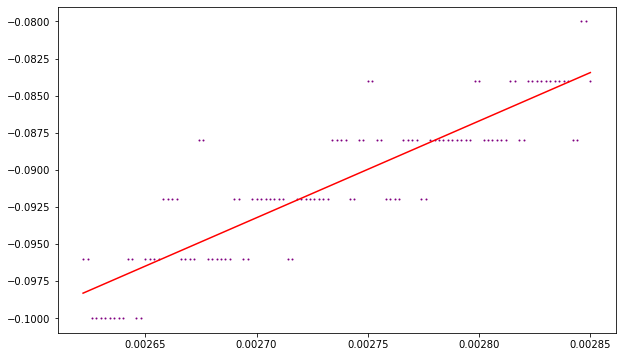

In [32]:
# Estimating the error using the technique learned in 9/24 lab
#--> due to the fact of the thickness of the blue line.

# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

linearSegment4PeakData = chopped4PeakData.loc[chopped4PeakData.x <= 0.00285]

#ax1.scatter(chopped4PeakData['x'], chopped4PeakData['y'], s=0.1, c='blue')
ax1.scatter(linearSegment4PeakData['x'], linearSegment4PeakData['y'], s=1, c='purple')


def linear(x, a, b):
    return a*x+b

guess = [1,1]
parametersLinear, covLinear = curve_fit(f=linear,
                                       xdata = linearSegment4PeakData['x'],
                                       ydata = linearSegment4PeakData['y'],
                                       p0 = guess)
a = parametersLinear[0]
b = parametersLinear[1]

linearOutputValues = pd.DataFrame([linear(i,a,b) for i in linearSegment4PeakData['x']])
linearOutputValues.columns = ['y']

# The linear best fit to this linear-ish segment
ax1.plot(linearSegment4PeakData['x'], linearOutputValues['y'], c='red')

linearSemgent4PeakData = linearSegment4PeakData.reset_index()
print(linearSegment4PeakData.reset_index(drop=True))
print(linearSegment4PeakData)

linearSegment4PeakData['diff_y'] = (linearSegment4PeakData['y'] - linearOutputValues['y'])**2.0
#diff_squared = pd.DataFrame(linearSegment4PeakData['y'] - linearOutputValues['y'])
#print(linearOutputValues)
print(linearSegment4PeakData)
#print(diff_squared)
